<a href="https://colab.research.google.com/github/asif1699/Deep-Learning-/blob/main/Image_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
! pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 44 kB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 3.8 MB 63.9 MB/s 
     |████████████████████████████████| 449 kB 77.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=19904f2ec22831928b940b9abb3fbc61dbb0b2b3be25e8209b6c9cd826e33191
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [ ]:
print(tf.__version__)

2.7.0


Importing pacakges

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

Loading Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/projects/1.image classification')

In [ ]:
!dir

dataset      Image\ classification\ using\ ANN.ipynb  test_examples.rar
dataset1     model_ANN.h5			      Unpack_sdtta0e8
dataset.rar  test_examples
flagged      test_examples1


In [ ]:
!pip install patool

     |████████████████████████████████| 77 kB 3.7 MB/s 


In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive('dataset.rar')

patool: Extracting dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/projects/1.image classification/dataset.rar"
patool:     with cwd='./Unpack_84q4r6oy'
patool: ... dataset.rar extracted to `dataset2' (local file exists).


'dataset2'

In [ ]:
patoolib.extract_archive('test_examples.rar')

patool: Extracting test_examples.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/projects/1.image classification/test_examples.rar"
patool:     with cwd='./Unpack_cvivrl1r'
patool: ... test_examples.rar extracted to `test_examples2' (local file exists).


'test_examples2'

In [ ]:
!dir

dataset      flagged				      test_examples1
dataset1     Image\ classification\ using\ ANN.ipynb  test_examples2
dataset2     model_ANN.h5			      test_examples.rar
dataset.rar  test_examples			      Unpack_sdtta0e8


In [ ]:
list(paths.list_images('dataset'))[:10]

['dataset/Forest/1004.jpg',
 'dataset/Forest/1017.jpg',
 'dataset/Forest/1024.jpg',
 'dataset/Forest/1025.jpg',
 'dataset/Forest/1050.jpg',
 'dataset/Forest/1034.jpg',
 'dataset/Forest/1063.jpg',
 'dataset/Forest/1079.jpg',
 'dataset/Forest/1080.jpg',
 'dataset/Forest/1074.jpg']

In [ ]:

print("[INFO] loading images...")
time1 = time.time()   
data = []

labels = []

classes = ["Forest", "Buildings"]


imagePaths = sorted(list(paths.list_images('dataset')
random.seed(SEED)
random.shuffle(imagePaths)


with tqdm(total=len(imagePaths)) as pbar:
    
    
    for imagePath in imagePaths:
      
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

        
        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Buildings" else 0
        labels.append(label)
        
    
        pbar.update(1)


data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   
print("done")

SyntaxError: ignored

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []

labels = []

classes = ["Forest", "Buildings"]

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('dataset')))   # data folder with 2 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

        # extract the class label from the image path and update the labels list
        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Buildings" else 0
        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/883 [00:00<?, ?it/s]

Time taken: 95.1 seconds
done


In [ ]:
print("total images:", len(data))

total images: 883


In [ ]:
print('sample image:{}'.format(data[0]))
print('no of pixels vlaues: {}'.format(len(data[0])))
print('label: {}'.format(classes[labels[0]]))

sample image:[0.31764706 0.29803922 0.28627451 ... 0.74117647 0.58823529 0.4627451 ]
no of pixels vlaues: 3072
label: Forest


Creating trian test splite

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED )

In [ ]:
trainX.shape

(706, 3072)

In [ ]:
trainY.shape

(706,)

In [ ]:
testY.shape

(177,)

In [ ]:
trainX

array([[0.20392157, 0.57254902, 0.34509804, ..., 0.00784314, 0.17254902,
        0.07843137],
       [0.85490196, 0.87843137, 0.95686275, ..., 0.        , 0.        ,
        0.01176471],
       [0.76862745, 0.77254902, 0.78039216, ..., 0.44313725, 0.46666667,
        0.48627451],
       ...,
       [0.88235294, 0.87058824, 0.80392157, ..., 0.21960784, 0.19215686,
        0.23137255],
       [0.84313725, 0.78823529, 0.79215686, ..., 0.3372549 , 0.36862745,
        0.62745098],
       [0.02352941, 0.35686275, 0.17254902, ..., 0.09411765, 0.28627451,
        0.21568627]])

In [ ]:
testY

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1])

In [ ]:
type(trainY)

numpy.ndarray

In [ ]:
testY

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1])

In [ ]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [ ]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
sample_image = (trainX[5]*255).astype('int')

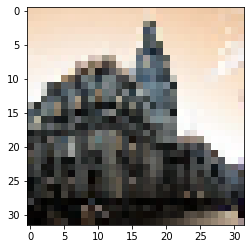

In [ ]:
plt.imshow(sample_image.reshape(32,32,3))

In [ ]:
trainY[5]

array([0., 1.], dtype=float32)

Defining the architecture of ANN model

In [ ]:
model = Sequential()
model.add(Dense(units=1024, input_shape=(3072,), kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=2, kernel_initializer='uniform', activation='softmax'))

Compiling tensorflow ANN model

In [ ]:
INIT_LR = 0.01
EPOCHS = 50
print('[INFO] compiling network network...')
opt = SGD(lr=INIT_LR)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

[INFO] compiling network network...


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 3,672,578
Trainable params: 3,672,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
time1 = time.time()
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))  

Epoch 1/50
23/23 [==============================] - 2s 12ms/step - loss: 0.6430 - accuracy: 0.5552 - val_loss: 0.6256 - val_accuracy: 0.5424
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6141 - accuracy: 0.5595 - val_loss: 0.6133 - val_accuracy: 0.8079
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5943 - accuracy: 0.6671 - val_loss: 0.5916 - val_accuracy: 0.5367
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.6544 - val_loss: 0.5611 - val_accuracy: 0.8418
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5496 - accuracy: 0.7450 - val_loss: 0.5243 - val_accuracy: 0.7571
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5274 - accuracy: 0.7450 - val_loss: 0.5052 - val_accuracy: 0.7627
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5049 - accuracy: 0.7663 - val_loss: 0.4756 - val_accuracy: 0.8136
Epoch 8/50
23/23 [=

Evaluating the model

In [ ]:
print('[INFO] evaluating network...')
pred_prob = model.predict(testX, batch_size=32)


In [ ]:
pred_prob[:10]

In [ ]:
test_y = [np.argmax(i) for i in testY]
pred_y = [np.argmax(i) for i in pred_prob]

In [ ]:
test_y[:10]

In [ ]:
pred_y[:10]

In [ ]:
def plot_confusion_metrix(y_true, y_pred, classes,
                          normalize=False, title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true,y_pred)


    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:, newaxis]
        print('Normalize Confusion matrix')
    else:
        print('Confusion Matrix Without Normalization')



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks_marks = np.arange(len(classes))
    plt.xticks(ticks_marks, classes, rotation=35)
    plt.yticks(ticks_marks, classes)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.

    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    


    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()



    print('---------------------------------')
    print('Classification report')
    print(classification_report(y_true, y_pred))

    print("----------------------------------")
    acc = accuracy_score(y_true, y_pred)
    print('Accuracy of the model:', acc)






In [ ]:
plot_confusion_metrix(test_y, pred_y,classes=["Forest: 0","Buildings: 1"])

Generating Plots for acc and val

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [ ]:
model.summary()

In [ ]:
print('[INFO] serializing network and label binarizer...')
model.save('model_ANN.h5')

In [ ]:
from tensorflow.keras.models import load_model
import pickle
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
width = 32
height = 32

testImagePaths = sorted(list(paths.list_images('test_examples')))


with tqdm(total=len(testImagePaths)) as pbar:

    for imagePath in testImagePaths:
        image = cv2.imread(imagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        image = image.astype('float')/255.0

        image = image.flatten()
        image = image.reshape((1, image.shape[0]))


        preds = model.predict(image)


        i = preds.argmax(axis=1)[0]
        label = classes[i]

        label = "{}: {:.2f}%".format(label, preds[0][i] * 100)


        output = imutils.resize(output, width=400)
        cv2.putText(output, label, (10,25), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)






Deployment

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://30465.gradio.app


In [ ]:
def predict_image(image):
    
    image = cv2.resize(image, (32, 32))

    
    image = image.astype("float") / 255.0

    
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))

    
    preds = model.predict(image).flatten()
    result = dict()
    result["Forest"] = round(float(list(preds)[0]), 3)
    result["Buildings"] = round(float(list(preds)[1]), 3)
    print(result)
    
    return result

im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="ANN Demo").launch(share=True)